In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

data1 = pd.read_csv("../Old_code/Data/Data_from_2021-11-26_final.csv", sep= ',',header=0, index_col=0)
data2 = pd.read_csv("../Old_code/Data/Data_from_2021-12-07_final.csv", sep= ',',header=0, index_col=0)
data=pd.concat([data1, data2])
data.head()

df = data.copy()
print(df)

                  DateTime  ProgramStatus  ToolNumber  PocketTable  \
0      2021-11-26 07:15:36            2.0         1.0          1.0   
1      2021-11-26 07:15:38            2.0         1.0          1.0   
2      2021-11-26 07:15:40            2.0         1.0          1.0   
6358   2021-11-26 07:15:41            2.0         1.0          1.0   
3      2021-11-26 07:15:42            2.0         1.0          1.0   
...                    ...            ...         ...          ...   
11002  2021-12-07 14:13:53            0.0         8.0          8.0   
11003  2021-12-07 14:13:55            0.0         8.0          8.0   
12252  2021-12-07 14:13:56            0.0         8.0          8.0   
11004  2021-12-07 14:13:57            0.0         8.0          8.0   
11005  2021-12-07 14:13:59            0.0         8.0          8.0   

       DriveStatus  DoorStatusTooling  OverrideFeed  FeedRate  SpindleSpeed  \
0              1.0                0.0          43.0    3440.0        2000.0   
1

In [2]:
features = df[['FeedRate','SpindleSpeed','IndoorGPSx','IndoorGPSy']].values  


Number of outliers detected (One-Class SVM): 1111


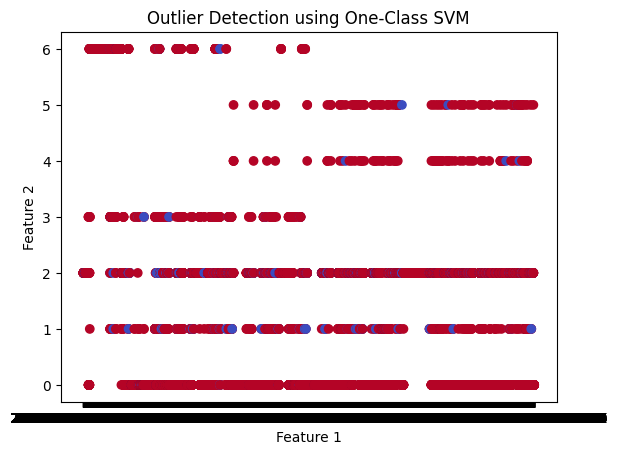

In [31]:
# Instantiate the OneClassSVM model
ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)  # Adjust 'gamma' and 'nu' based on your data

# Fit the model
ocsvm.fit(features)

# Predict outliers
outlier_pred = ocsvm.predict(features)

# -1 for outliers and 1 for inliers
df['outlier_ocsvm'] = outlier_pred

# Print the number of outliers detected
num_outliers_ocsvm = np.sum(df['outlier_ocsvm'] == -1)
print(f"Number of outliers detected (One-Class SVM): {num_outliers_ocsvm}")

# Optionally, visualize the outliers
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['outlier_ocsvm'], cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Outlier Detection using One-Class SVM')
plt.show()

In [32]:
np.sum(df['outlier_ocsvm'] == 1)

20829

In [33]:
df_clean = df[df['outlier_ocsvm'] == 1].drop(columns=['outlier_ocsvm'])

In [34]:
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_clean.shape}")

Original DataFrame shape: (21940, 16)
Cleaned DataFrame shape: (20829, 15)


In [35]:
df_clean.drop(columns=['outlier'])


,DateTime,ProgramStatus,ToolNumber,PocketTable,DriveStatus,DoorStatusTooling,OverrideFeed,FeedRate,SpindleSpeed,IndoorGPSx,IndoorGPSy,Phase,Phase_compressed,Production
0,2021-11-26 07:15:36,2.0,1.0,1.0,1.0,0.0,43.0,3440.0,2000.0,-0.262,0.886,20,4,0
1,2021-11-26 07:15:38,2.0,1.0,1.0,1.0,0.0,43.0,3440.0,1999.0,-0.251,0.840,20,4,0
2,2021-11-26 07:15:40,2.0,1.0,1.0,1.0,0.0,43.0,3440.0,1999.0,-0.234,0.724,20,4,0
6358,2021-11-26 07:15:41,2.0,1.0,1.0,1.0,0.0,43.0,3440.0,1999.0,-0.231,0.741,20,4,0
4,2021-11-26 07:15:44,2.0,1.0,1.0,1.0,0.0,43.0,3440.0,2000.0,-0.204,0.731,20,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11002,2021-12-07 14:13:53,0.0,8.0,8.0,0.0,0.0,100.0,0.0,0.0,-0.470,0.373,21,5,1
11003,2021-12-07 14:13:55,0.0,8.0,8.0,0.0,0.0,100.0,0.0,0.0,-0.289,0.399,21,5,1
12252,2021-12-07 14:13:56,0.0,8.0,8.0,0.0,0.0,100.0,0.0,0.0,-0.388,0.512,21,5,1
11004,2021-12-07 14:13:57,0.0,8.0,8.0,0.0,0.0,100.0,0.0,0.0,-0.457,0.571,21,5,1


In [36]:
df_clean.to_csv('../Data/Cleaned_Data.csv')